In [1]:
# Import libraries 

import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
# Download data from yfinance dataset 
def fetch_and_process_hourly_data(ticker, start_date, end_date): 

    # Download hourly stock data with interval hardcoded into the function as 1h
    df = yf.download(ticker, start= start_date, end = end_date, interval= "1h")

    # Check if data is multi-index columns 
    if isinstance(df.columns, pd.MultiIndex): 
        # Extract ticker's data by slicing the second level of columns
        df_ticker = df.xs(ticker, axis = 1, level = 1)
    else: 
        df_ticker = df
    
    # Compute log returns on Close price 
    df_ticker["log_return"] = np.log(df_ticker["Close"] / df_ticker["Close"].shift(1))

    # Remove the first row after computing log returns to remove NaN log return 
    df_ticker = df_ticker.dropna(subset = ['log_return'])
    
    return df_ticker
    

In [ ]:
# Example usage: 

ticker = "AAPL"
start_date = "2025-07-25"
end_date = "2025-07-30"

data = fetch_and_process_hourly_data(ticker, start_date, end_date)

### Dataset Familiarity 
# Quick overview of the data 
print(data.info())

# Summary statistics for numeric columns 
print(data.describe())

# Check for missing values by column 
print(data.isnull().sum())

/var/folders/34/mh55f40j11qcbq5hh0hfw_3w0000gn/T/ipykernel_20261/3193572490.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start= start_date, end = end_date, interval= "1h")
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2025-07-25 14:30:00+00:00 to 2025-07-29 19:30:00+00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       20 non-null     float64
 1   High        20 non-null     float64
 2   Low         20 non-null     float64
 3   Open        20 non-null     float64
 4   Volume      20 non-null     int64  
 5   log_return  20 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.1 KB
None
Price       Close        High         Low        Open        Volume  \
count   20.000000   20.000000   20.000000   20.000000  2.000000e+01   
mean   213.358980  213.895915  212.940590  213.530820  4.512550e+06   
std      1.074067    0.996766    1.160644    1.004559  2.136439e+06   
min    211.350006  211.910004  210.824997  211.880997  2.392173e+06   
25%    212.149998  213.168728  211.786251  212.832497  3.051906e+06   
50%    213.722504  214.035004  213.4074

In [4]:
### Univariate Analysis: plot histograms for distributions, boxplots for outliers and calculate skewness and kurtosis 

def univariate_analysis(df):
    # Select the numeric_columns 
    numeric_cols = df.select_dtypes(include = ["float64","int64"]).columns.tolist()

    # Initialise dictionary storing boundary values  
    boundaries = {}

    # Initialise dictionary storing outlier_counts 
    outlier_counts = {}

    ## Graph plotting and calculation of IQR
    for col in numeric_cols: 
        
        # Q1 value 
        Q1 = float(df[col].quantile(0.25))
        
        # Q3 value 
        Q3 = float(df[col].quantile(0.75))

        # IQR value 
        IQR = Q3 - Q1
        
        # Calculate boundary values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Add entry to dictionary with key = col and value = (lower_bound, upper_bound)
        boundaries[col] = (lower_bound, upper_bound)

        # define the outlier range 
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # count number of outliers / column + store in dictionary entry 
        count_outliers = len(outliers)
        outlier_counts[col] = count_outliers
         
        print(f"IQR value for column '{col}': {IQR}, for a Q1 and Q3 value of {Q1,Q3}")
        print("-----")

        plt.figure(figsize = (12,4))
        
        plt.subplot(1,2,1)
        sns.histplot(df[col].dropna(), kde = True)
        plt.title(f"Histogram of {col}")
        
        plt.subplot(1,2,2)
        sns.boxplot(x = df[col])
        plt.title(f"Boxplot of {col}")

        plt.show()

        print(f"Skewness of {col}: {df[col].skew()}")
        print(f"Kurtosis of {col}… {df[col].kurtosis()}")
        print("----")

    # Print univariate analysis summary
    print(f"Summary of boundaries and outlier count: {boundaries}, {outlier_counts}")

IQR value for column 'Close': 2.074901580810547, for a Q1 and Q3 value of (212.14999771118164, 214.2248992919922)
-----


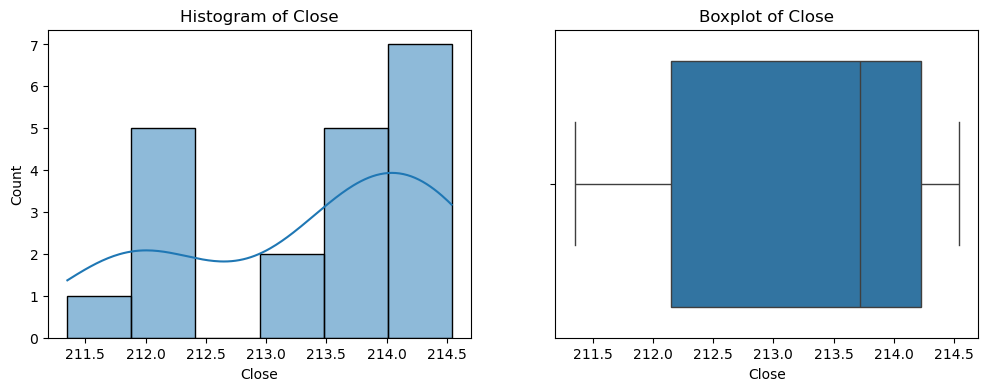

Skewness of Close: -0.6046617091513016
Kurtosis of Close… -1.1823060822396507
----
IQR value for column 'High': 1.4962730407714844, for a Q1 and Q3 value of (213.16872787475586, 214.66500091552734)
-----


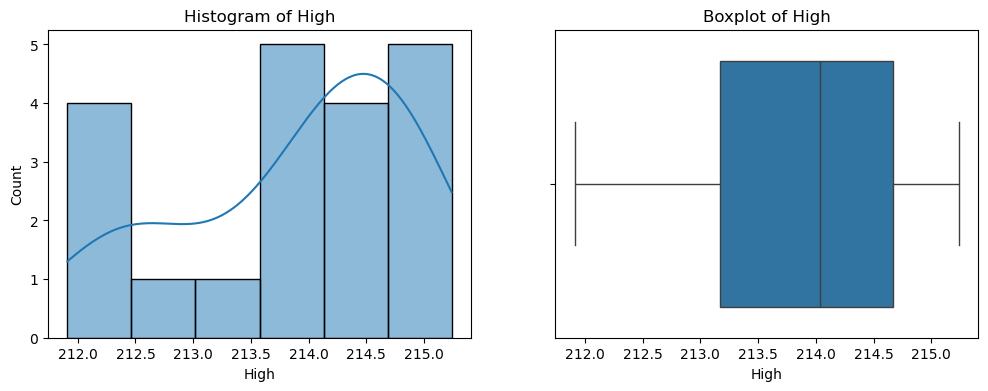

Skewness of High: -0.7293293889920297
Kurtosis of High… -0.7519841277809833
----
IQR value for column 'Low': 2.0887527465820312, for a Q1 and Q3 value of (211.78625106811523, 213.87500381469727)
-----


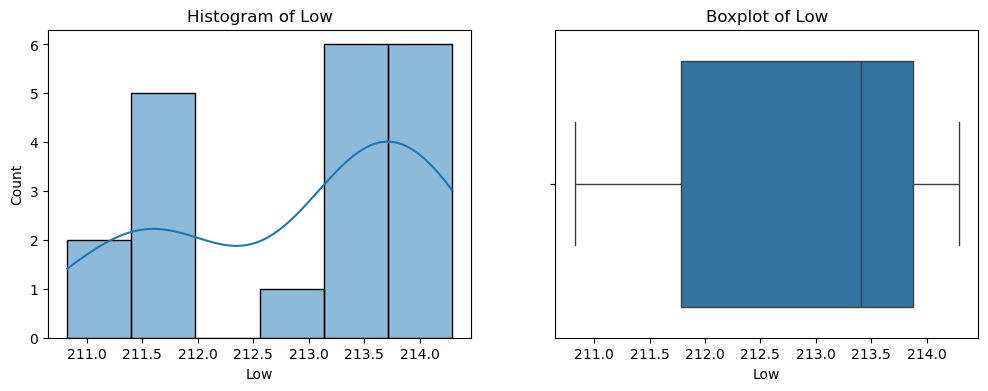

Skewness of Low: -0.5790788218189508
Kurtosis of Low… -1.2573451197169732
----
IQR value for column 'Open': 1.5700035095214844, for a Q1 and Q3 value of (212.8324966430664, 214.4025001525879)
-----


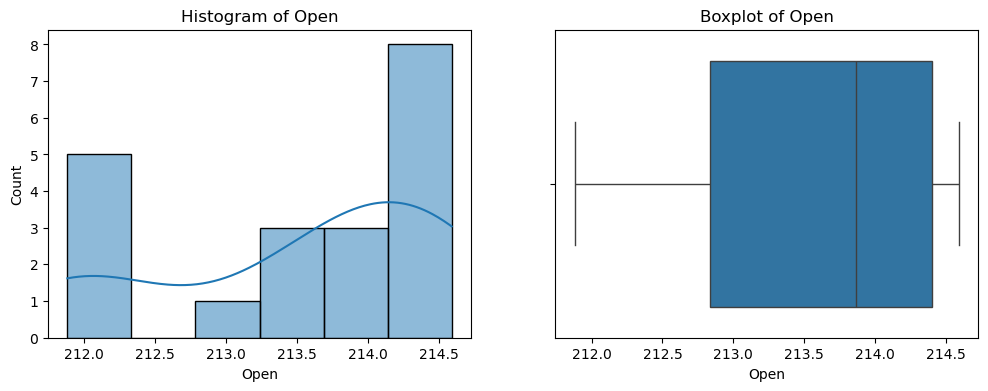

Skewness of Open: -0.7271309385400131
Kurtosis of Open… -1.0405793250461266
----
IQR value for column 'Volume': 1863308.75, for a Q1 and Q3 value of (3051905.5, 4915214.25)
-----


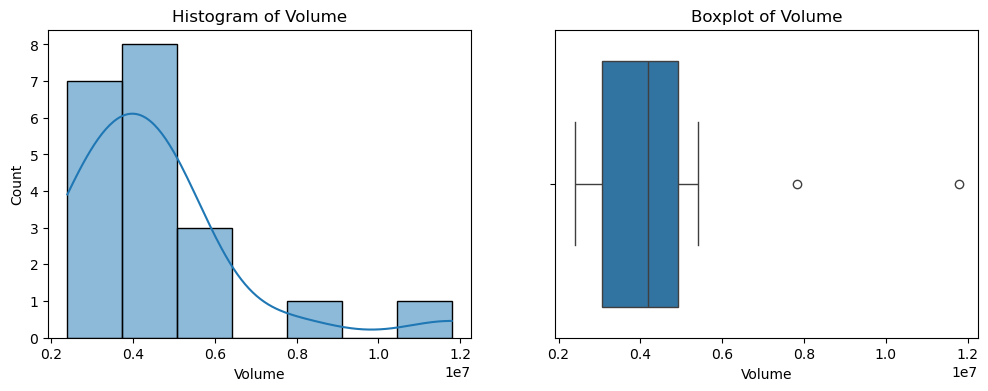

Skewness of Volume: 2.326425131769005
Kurtosis of Volume… 6.835155704940616
----
IQR value for column 'log_return': 0.0023038078000900504, for a Q1 and Q3 value of (-0.001755360008341404, 0.0005484477917486465)
-----


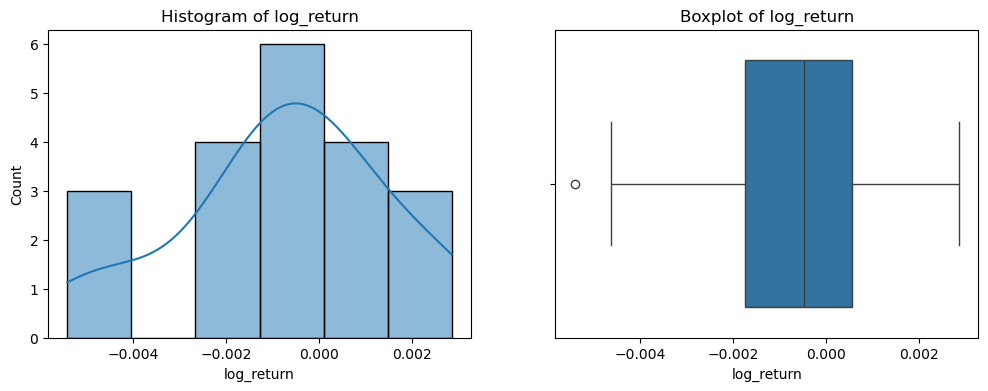

Skewness of log_return: -0.4371557325655532
Kurtosis of log_return… -0.032697398621659435
----
Summary of boundaries and outlier count: {'Close': (209.03764533996582, 217.337251663208), 'High': (210.92431831359863, 216.90941047668457), 'Low': (208.6531219482422, 217.0081329345703), 'Open': (210.47749137878418, 216.75750541687012), 'Volume': (256942.375, 7710177.375), 'log_return': (-0.00521107170847648, 0.004004159491883722)}, {'Close': 0, 'High': 0, 'Low': 0, 'Open': 0, 'Volume': 2, 'log_return': 1}


In [5]:
analysis = univariate_analysis(data)
analysis 

Output analysis: 

- Volume has 2 outliers: 
    positive skewness (right-skewness), most days have a lower trading volume, but some days have very high spikes 
    high kurtosis suggests a heavy tail, meaning that extreme values are more common than in a normal distribution 
    so those 2 outliers correspond to those rare days with unusually large trading volumes 

- Log_return has 1 outlier: 
    negative skewness (left-skewness), returns lean a bit toward negative values 
    near zero kurtosis means that the distribution is close to normal 
    having only 1 outlier suggests that log returns are mostly stable with very few extreme move

Handling: 

Volume spikes: could keep them in but cap them to limit their influence 
Log_return: keep, since extreme returns are important in financial risk modelling 

In [6]:
# Missing input analysis 
data.isnull().sum()[data.isnull().sum()> 0]

# Visualise first 5 rows of data
data.head()

Price,Close,High,Low,Open,Volume,log_return
Datetime,,,,,,
2025-07-25 14:30:00+00:00,214.509995,215.240005,214.210007,214.589996,5133351,-0.000351
2025-07-25 15:30:00+00:00,214.389603,214.639999,214.050003,214.500000,5205668,-0.000561
2025-07-25 16:30:00+00:00,214.169998,214.589996,214.039993,214.389999,2636543,-0.001025
2025-07-25 17:30:00+00:00,213.889999,214.509995,213.820007,214.170395,3060915,-0.001308
2025-07-25 18:30:00+00:00,213.500000,214.009995,213.399994,213.910004,2957957,-0.001825


Output shows that there are no missing inputs

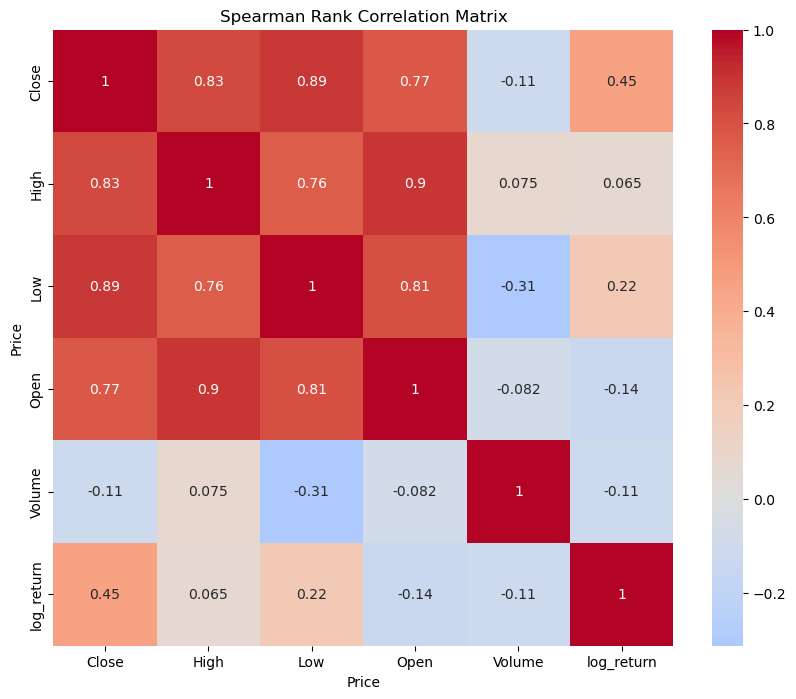

In [ ]:
### Correlation exploration 

# Subset of numeric columns 
data_numeric_cols = data[data.select_dtypes(include = ["float64", "int64"]).columns]

# Compute Spearman rank correlation matrix 
spearman_corr = data_numeric_cols.corr(method = "spearman")

# Plot correlation heatmap 
plt.figure(figsize = (10,8))
sns.heatmap(spearman_corr, annot = True, cmap = "coolwarm", center = 0)
plt.title("Spearman Rank Correlation Matrix")
plt.show()

In [19]:
### Identify strong correlation 

# Find strong monotonic correlations 
threshold = 0.7 
strong_corrs = spearman_corr[(spearman_corr.abs() >= threshold) &  (spearman_corr.abs() < 1.0)]
print(strong_corrs)

Price          Close      High       Low      Open  Volume  log_return
Price                                                                 
Close            NaN  0.833396  0.885714  0.772471     NaN         NaN
High        0.833396       NaN  0.758932  0.896163     NaN         NaN
Low         0.885714  0.758932       NaN  0.808575     NaN         NaN
Open        0.772471  0.896163  0.808575       NaN     NaN         NaN
Volume           NaN       NaN       NaN       NaN     NaN         NaN
log_return       NaN       NaN       NaN       NaN     NaN         NaN


Interpretation: 

Close prices move in a strong monotonic fashion with High, Low and Open prices 
High prices move in a strong monotonic fashion with Low and Open 
Low prices move in a strong monotonic fashion with Open 

This is as to be expected as the price columns come from the same day's trading range, so a high rank correlation is natural 

<Axes: xlabel='Close', ylabel='Low'>

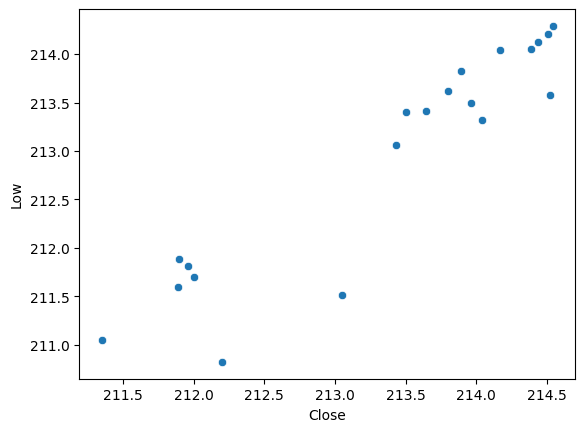

In [10]:
sns.scatterplot(data = data, x = "Close", y = "Low")